# imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
from collections import Counter
from haversine import haversine

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV,cross_val_score,train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score,roc_auc_score,classification_report,plot_confusion_matrix

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

dt = DecisionTreeClassifier()
rfclf = RandomForestClassifier()
ada = AdaBoostClassifier()
gbclf = GradientBoostingClassifier()
logit = LogisticRegression()
xgbclf = XGBClassifier()
models = [dt,rfclf,ada,gbclf,logit,xgbclf]

# code

In [6]:
train_path ="../data/train_clear.csv"
test_path = "../data/test_clear.csv"

In [7]:
test = pd.read_csv(test_path)

In [8]:
train = pd.read_csv(train_path)
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,3495,"Psychologist, counselling",1988-03-09 00:00:00,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01 00:00:00,30.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,149,Special educational needs teacher,1978-06-21 00:00:00,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01 00:00:00,40.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,4154,Nature conservation officer,1962-01-19 00:00:00,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01 00:00:00,56.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1939,Patent attorney,1967-01-12 00:00:00,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01 00:00:00,51.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,99,Dance movement psychotherapist,1986-03-28 00:00:00,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01 00:00:00,32.0


Feature eng.

In [9]:

coordenadas_proprietario = []
for lat,long in zip(train["lat"],train["long"]):
    coordenadas_proprietario.append((lat,long))

coordenadas_fraud= []
for lat,long in zip(train["merch_lat"],train["merch_long"]):
    coordenadas_fraud.append((lat,long))

dist_km = []
for vit,fraud in zip(coordenadas_proprietario,coordenadas_fraud):
    dist_km.append(round(haversine(vit,fraud),3))

train["dist_fraude_km"] = dist_km

In [10]:
coordenadas_proprietario = []
for lat,long in zip(test["lat"],test["long"]):
    coordenadas_proprietario.append((lat,long))

coordenadas_fraud= []
for lat,long in zip(test["merch_lat"],test["merch_long"]):
    coordenadas_fraud.append((lat,long))

dist_km = []
for vit,fraud in zip(coordenadas_proprietario,coordenadas_fraud):
    dist_km.append(round(haversine(vit,fraud),3))

test["dist_fraude_km"] = dist_km

In [11]:
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,age,dist_fraude_km
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,"Psychologist, counselling",1988-03-09 00:00:00,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01 00:00:00,30.0,78.598
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,Special educational needs teacher,1978-06-21 00:00:00,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01 00:00:00,40.0,30.212
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,Nature conservation officer,1962-01-19 00:00:00,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01 00:00:00,56.0,108.206
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,Patent attorney,1967-01-12 00:00:00,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01 00:00:00,51.0,95.673
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,Dance movement psychotherapist,1986-03-28 00:00:00,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01 00:00:00,32.0,77.557


dropando colunas inutei para o modelo

In [12]:
train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'age', 'dist_fraude_km'],
      dtype='object')

# Feature selection

In [13]:
# train_model_prep = train.drop(columns = ['trans_date_trans_time','city','lat','long','dob','merch_lat','merch_long','trans_date','state','street',"first","last","unix_time","merchant","cc_num","trans_num","zip","gender","job"])

In [14]:
train_model_prep = train.copy()

In [15]:
train_model_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [16]:
train_model_prep.head(10)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,age,dist_fraude_km
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,"Psychologist, counselling",1988-03-09 00:00:00,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01 00:00:00,30.0,78.598
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,Special educational needs teacher,1978-06-21 00:00:00,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01 00:00:00,40.0,30.212
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,Nature conservation officer,1962-01-19 00:00:00,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01 00:00:00,56.0,108.206
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,Patent attorney,1967-01-12 00:00:00,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01 00:00:00,51.0,95.673
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,Dance movement psychotherapist,1986-03-28 00:00:00,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01 00:00:00,32.0,77.557
5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,...,Transport planner,1961-06-19 00:00:00,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0,2019-01-01 00:00:00,57.0,85.923
6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,...,Arboriculturist,1993-08-16 00:00:00,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0,2019-01-01 00:00:00,25.0,118.120
7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,...,"Designer, multimedia",1947-08-21 00:00:00,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0,2019-01-01 00:00:00,71.0,12.767
8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,...,Public affairs consultant,1941-03-07 00:00:00,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0,2019-01-01 00:00:00,77.0,25.271
9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,...,Pathologist,1974-03-28 00:00:00,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0,2019-01-01 00:00:00,44.0,74.078


In [17]:
train_model_prep.drop(columns=['street','trans_num','unix_time','first','last','trans_date_trans_time','trans_date'],inplace=True)
#train_model_prep['']

In [18]:
train_model_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 18 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   cc_num          1296675 non-null  int64  
 1   merchant        1296675 non-null  object 
 2   category        1296675 non-null  object 
 3   amt             1296675 non-null  float64
 4   gender          1296675 non-null  object 
 5   city            1296675 non-null  object 
 6   state           1296675 non-null  object 
 7   zip             1296675 non-null  int64  
 8   lat             1296675 non-null  float64
 9   long            1296675 non-null  float64
 10  city_pop        1296675 non-null  int64  
 11  job             1296675 non-null  object 
 12  dob             1296675 non-null  object 
 13  merch_lat       1296675 non-null  float64
 14  merch_long      1296675 non-null  float64
 15  is_fraud        1296675 non-null  int64  
 16  age             1296675 non-null  fl

In [19]:
# le_category = LabelEncoder()

In [20]:
le = LabelEncoder()
for col in train_model_prep.columns:
     if train_model_prep[col].dtypes == object:
         train_model_prep[col]= le.fit_transform(train_model_prep[col])

In [21]:
# le_category.fit(train_model_prep['category'])
# train_model_prep['category'] = le_category.transform(train_model_prep['category'])

In [22]:
train_model_prep.drop(columns=['cc_num'],inplace=True)

In [23]:
train_model_prep.head()

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,age,dist_fraude_km
0,514,8,4.97,0,526,27,28654,36.0788,-81.1781,3495,370,779,36.011293,-82.048315,0,30.0,78.598
1,241,4,107.23,0,612,47,99160,48.8878,-118.2105,149,428,607,49.159047,-118.186462,0,40.0,30.212
2,390,0,220.11,1,468,13,83252,42.1808,-112.2620,4154,307,302,43.150704,-112.154481,0,56.0,108.206
3,360,2,45.00,1,84,26,59632,46.2306,-112.1138,1939,328,397,47.034331,-112.561071,0,51.0,95.673
4,297,9,41.96,1,216,45,24433,38.4207,-79.4629,99,116,734,38.674999,-78.632459,0,32.0,77.557


In [24]:
# for col in train_model_prep.columns:
#     if train_model_prep[col].dtypes == object:
#         train_model_prep[col]= le.fit_transform(train_model_prep[col])

In [25]:
train_model_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 17 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   merchant        1296675 non-null  int32  
 1   category        1296675 non-null  int32  
 2   amt             1296675 non-null  float64
 3   gender          1296675 non-null  int32  
 4   city            1296675 non-null  int32  
 5   state           1296675 non-null  int32  
 6   zip             1296675 non-null  int64  
 7   lat             1296675 non-null  float64
 8   long            1296675 non-null  float64
 9   city_pop        1296675 non-null  int64  
 10  job             1296675 non-null  int32  
 11  dob             1296675 non-null  int32  
 12  merch_lat       1296675 non-null  float64
 13  merch_long      1296675 non-null  float64
 14  is_fraud        1296675 non-null  int64  
 15  age             1296675 non-null  float64
 16  dist_fraude_km  1296675 non-null  fl

In [26]:
train_model_prep

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,age,dist_fraude_km
0,514,8,4.97,0,526,27,28654,36.0788,-81.1781,3495,370,779,36.011293,-82.048315,0,30.0,78.598
1,241,4,107.23,0,612,47,99160,48.8878,-118.2105,149,428,607,49.159047,-118.186462,0,40.0,30.212
2,390,0,220.11,1,468,13,83252,42.1808,-112.2620,4154,307,302,43.150704,-112.154481,0,56.0,108.206
3,360,2,45.00,1,84,26,59632,46.2306,-112.1138,1939,328,397,47.034331,-112.561071,0,51.0,95.673
4,297,9,41.96,1,216,45,24433,38.4207,-79.4629,99,116,734,38.674999,-78.632459,0,32.0,77.557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,499,0,15.56,1,330,44,84735,37.7175,-112.4777,258,215,298,36.841266,-111.690765,0,58.0,119.752
1296671,2,1,51.70,1,813,20,21790,39.2667,-77.5101,100,360,630,38.906881,-78.246528,0,40.0,75.104
1296672,599,1,105.93,1,346,32,88325,32.9396,-105.8189,899,308,412,33.619513,-105.130529,0,52.0,99.048
1296673,509,1,74.90,1,471,41,57756,43.3526,-102.5411,1126,485,639,42.788940,-103.241160,0,39.0,84.628


In [27]:
X = train_model_prep.drop(columns=["is_fraud"])
y = train_model_prep.is_fraud

In [28]:
print("Dimensões X = {} , y = {}".format(X.shape, y.shape))

Dimensões X = (1296675, 16) , y = (1296675,)


In [29]:
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 1289169, 1: 7506})


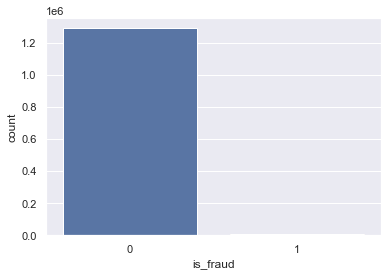

In [30]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="is_fraud", data=train_model_prep)

Balanceando as classes

In [31]:
from imblearn.over_sampling import RandomOverSampler

In [32]:
ros = RandomOverSampler(random_state=42)

In [33]:
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.30,random_state=42)

In [34]:
X_res_train, y_res_train = ros.fit_resample(x_train, y_train)

In [35]:
print('Original dataset shape %s' % Counter(y_res_train))

Original dataset shape Counter({0: 902451, 1: 902451})


Separando os dados em treino e validação

In [36]:
print("Exibindo as dimensões dos nossos dados de treino: ")
print("X_train --> {}".format(X_res_train.shape))
print("y_train --> {}".format(y_res_train.shape))
print("X_val --> {}".format(x_val.shape))
print("y_val --> {}".format(y_val.shape))

Exibindo as dimensões dos nossos dados de treino: 
X_train --> (1804902, 16)
y_train --> (1804902,)
X_val --> (389003, 16)
y_val --> (389003,)


In [37]:
# feature selection function
from sklearn.feature_selection import SelectFromModel

def best_features(models: list, x,y, cols_name):
    for model in models:
        # selecionando as features para o modelo
        select = SelectFromModel(estimator=model)
        X_transformed = select.fit_transform(x,y)

        # vendo as features por modelo
        sup = select.get_support()

        # imprimindo as features
        print(f"Feature para o modelo {model.__class__.__name__}")

        print([
            x for x,y  in zip(cols_name, sup) if y==True
        ])
        print("*"*50)


In [34]:
cols_name = train_model_prep.columns
cols_name

Index(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'merch_lat', 'merch_long', 'is_fraud',
       'age', 'dist_fraude_km'],
      dtype='object')

In [38]:
models

[DecisionTreeClassifier(),
 RandomForestClassifier(),
 AdaBoostClassifier(),
 GradientBoostingClassifier(),
 LogisticRegression(),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, gamma=None,
               gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, predictor=None, random_state=None,
               reg_alpha=None, reg_lambda=None, ...)]

In [38]:
%%time
best_features(models,X_res_train,y_res_train,cols_name)

Feature para o modelo DecisionTreeClassifier
['category', 'amt']
**************************************************
Feature para o modelo RandomForestClassifier
['category', 'amt']
**************************************************
Feature para o modelo AdaBoostClassifier
['category', 'amt']
**************************************************
Feature para o modelo GradientBoostingClassifier
['category', 'amt']
**************************************************
Feature para o modelo LogisticRegression
['trans_date_trans_time', 'city_pop', 'trans_num']
**************************************************
Feature para o modelo XGBClassifier
['category', 'amt', 'dob']
**************************************************
CPU times: total: 1h 11min 9s
Wall time: 49min 18s


category, amt,age,city_pop

In [39]:
X_res_train=X_res_train[['category', 'amt','age','city_pop']]

In [40]:
X_res_train

,category,amt,age,city_pop
0,11,2.38,23.0,564
1,12,6.53,35.0,27971
2,11,6.62,37.0,23727
3,8,24.86,35.0,116155
4,6,25.65,34.0,19685
...,...,...,...,...
1804897,11,1033.78,45.0,5507
1804898,3,9.47,34.0,409656
1804899,2,9.49,43.0,2054
1804900,2,7.14,67.0,4984


Nessa parte vamos fazer a escolha do nosso modelo, para isso instanciaremos diversos modeles treinaremos os mesmo, logo após isso vamos escolher os melhores baseado em suas metricas

importando os modelos

In [41]:
def best_model(x,y,model_list:list,cv=3):
    print("-"*50)
    df_ret = []
    for m in model_list:
        recall=[]
        f1 = []
        acc = []
        precision = []
        print(m.__class__.__name__)
        for score in ["recall","f1","accuracy","precision"]:
            cvs = cross_val_score(m, x,y, scoring=score, cv=cv)
            mean = cvs.mean()
            std = cvs.std()
            print(score + " : "+ str(round(mean,3)) + " std : "+ str(round(std,3)))
            print("Intervalo :  [{:.2f}% ~ {:.2f}%]".format((mean - 2*std)*100, (mean + 2*std)*100))
            print()
            if score == "recall":
                recall.append(round(mean,3))
            elif score == "f1":
                f1.append(round(mean,3))
            elif score == "accuracy":
                acc.append(round(mean,3))
            else:
                precision.append(round(mean,3))

        df_ret.append(pd.DataFrame(data=zip(recall,f1,acc,precision), index=[m.__class__.__name__], columns=['recall','f1','accuracy','precision']))



        print()
    return pd.concat(df_ret,sort=True)

In [42]:
def fit_models(models_list:list, x,y):
    retorno = []
    print("[INFO]: Iniciando o treinamento dos modelos")
    print("[INFO]: Shape do treinamento X : {}".format(x.shape))
    print("[INFO]: Shape do treinamento y : {}".format(y.shape))
    print("-"*50)
    for model in models_list:
        print("[INFO]: modelo a ser treinado  ",model.__class__.__name__)
        model.fit(x,y)
        print("[INFO]:Treinamento do modelo conlcuido")
        print("-"*50)
        retorno.append(model)
    return retorno

In [49]:
df_model = best_model(X_res_train,y_res_train,models)

--------------------------------------------------
DecisionTreeClassifier
recall : 1.0 std : 0.0
Intervalo :  [100.00% ~ 100.00%]

f1 : 0.999 std : 0.0
Intervalo :  [99.88% ~ 99.88%]

accuracy : 0.999 std : 0.0
Intervalo :  [99.88% ~ 99.89%]

precision : 0.998 std : 0.0
Intervalo :  [99.75% ~ 99.77%]


RandomForestClassifier
recall : 1.0 std : 0.0
Intervalo :  [100.00% ~ 100.00%]

f1 : 0.999 std : 0.0
Intervalo :  [99.90% ~ 99.91%]

accuracy : 0.999 std : 0.0
Intervalo :  [99.91% ~ 99.91%]

precision : 0.998 std : 0.0
Intervalo :  [99.81% ~ 99.82%]


AdaBoostClassifier
recall : 0.894 std : 0.006
Intervalo :  [88.33% ~ 90.55%]

f1 : 0.911 std : 0.005
Intervalo :  [90.02% ~ 92.15%]

accuracy : 0.912 std : 0.005
Intervalo :  [90.21% ~ 92.29%]

precision : 0.928 std : 0.005
Intervalo :  [91.77% ~ 93.82%]


GradientBoostingClassifier
recall : 0.945 std : 0.0
Intervalo :  [94.43% ~ 94.48%]

f1 : 0.952 std : 0.0
Intervalo :  [95.14% ~ 95.27%]

accuracy : 0.952 std : 0.0
Intervalo :  [95.18% ~

# Avaliar os dados do df_model

In [50]:
df_model

,accuracy,f1,precision,recall
DecisionTreeClassifier,0.999,0.999,0.998,1.000
RandomForestClassifier,0.999,0.999,0.998,1.000
AdaBoostClassifier,0.912,0.911,0.928,0.894
GradientBoostingClassifier,0.952,0.952,0.960,0.945
LogisticRegression,0.834,0.819,0.898,0.754
XGBClassifier,0.992,0.992,0.984,1.000


## Aqui vamos ordenar os dados de maneira decrescente  por duas colunas que são elas: precision, recall

In [52]:
df_model.sort_values(by=['precision','f1'],ascending=False)

,accuracy,f1,precision,recall
DecisionTreeClassifier,0.999,0.999,0.998,1.000
RandomForestClassifier,0.999,0.999,0.998,1.000
XGBClassifier,0.992,0.992,0.984,1.000
GradientBoostingClassifier,0.952,0.952,0.960,0.945
AdaBoostClassifier,0.912,0.911,0.928,0.894
LogisticRegression,0.834,0.819,0.898,0.754


In [53]:
models

[DecisionTreeClassifier(),
 RandomForestClassifier(),
 AdaBoostClassifier(),
 GradientBoostingClassifier(),
 LogisticRegression(),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, gamma=None,
               gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, predictor=None, random_state=None,
               reg_alpha=None, reg_lambda=None, ...)]

Percebemos que os moledos a serem escolhidos vão ser: RandomFlorestCLf, DecisionTreeClf, XGBClf

In [54]:
model_train = fit_models([rfclf,dt,xgbclf],X_res_train,y_res_train)

[INFO]: Iniciando o treinamento dos modelos
[INFO]: Shape do treinamento X : (1804902, 4)
[INFO]: Shape do treinamento y : (1804902,)
--------------------------------------------------
[INFO]: modelo a ser treinado   RandomForestClassifier
[INFO]:Treinamento do modelo conlcuido
--------------------------------------------------
[INFO]: modelo a ser treinado   DecisionTreeClassifier
[INFO]:Treinamento do modelo conlcuido
--------------------------------------------------
[INFO]: modelo a ser treinado   XGBClassifier
[INFO]:Treinamento do modelo conlcuido
--------------------------------------------------


In [43]:
x_val = x_val[['category', 'amt','age','city_pop']]

In [44]:
x_val

,category,amt,age,city_pop
1045211,9,194.51,22.0,972
547406,5,52.32,90.0,217
110142,12,6.53,73.0,184
1285953,6,7.33,67.0,10717
271705,2,64.29,45.0,635
...,...,...,...,...
421133,2,65.09,38.0,5848
695406,5,22.57,58.0,1132
1259079,2,63.91,21.0,166081
137364,1,59.18,40.0,198


In [64]:
df_model_train = best_model(x_val,y_val,model_train)

--------------------------------------------------
RandomForestClassifier
recall : 0.67 std : 0.018
Intervalo :  [63.38% ~ 70.62%]

f1 : 0.737 std : 0.009
Intervalo :  [71.99% ~ 75.45%]

accuracy : 0.997 std : 0.0
Intervalo :  [99.70% ~ 99.74%]

precision : 0.816 std : 0.004
Intervalo :  [80.84% ~ 82.31%]


DecisionTreeClassifier
recall : 0.66 std : 0.012
Intervalo :  [63.56% ~ 68.52%]

f1 : 0.656 std : 0.012
Intervalo :  [63.25% ~ 67.94%]

accuracy : 0.996 std : 0.0
Intervalo :  [99.55% ~ 99.62%]

precision : 0.65 std : 0.014
Intervalo :  [62.16% ~ 67.75%]


XGBClassifier
recall : 0.684 std : 0.023
Intervalo :  [63.73% ~ 72.99%]

f1 : 0.748 std : 0.011
Intervalo :  [72.52% ~ 76.98%]

accuracy : 0.997 std : 0.0
Intervalo :  [99.72% ~ 99.74%]

precision : 0.825 std : 0.007
Intervalo :  [81.13% ~ 83.96%]




In [65]:
df_model_train.sort_values(by=['precision','recall'],ascending=False)

,accuracy,f1,precision,recall
XGBClassifier,0.997,0.748,0.825,0.684
RandomForestClassifier,0.997,0.737,0.816,0.670
DecisionTreeClassifier,0.996,0.656,0.650,0.660


Aqui vemos indicação de que o melhor foi o randomflorest

In [ ]:
model_train

In [ ]:
model = model_train[2]

In [58]:
model = fit_models([xgbclf],X_res_train,y_res_train)

[INFO]: Iniciando o treinamento dos modelos
[INFO]: Shape do treinamento X : (1804902, 4)
[INFO]: Shape do treinamento y : (1804902,)
--------------------------------------------------
[INFO]: modelo a ser treinado   XGBClassifier
[INFO]:Treinamento do modelo conlcuido
--------------------------------------------------


In [59]:
model = model[0]

In [60]:
model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

Identificando as features de maiores importancia no modelo

In [61]:
x_val

,category,amt,age,city_pop
1045211,9,194.51,22.0,972
547406,5,52.32,90.0,217
110142,12,6.53,73.0,184
1285953,6,7.33,67.0,10717
271705,2,64.29,45.0,635
...,...,...,...,...
421133,2,65.09,38.0,5848
695406,5,22.57,58.0,1132
1259079,2,63.91,21.0,166081
137364,1,59.18,40.0,198


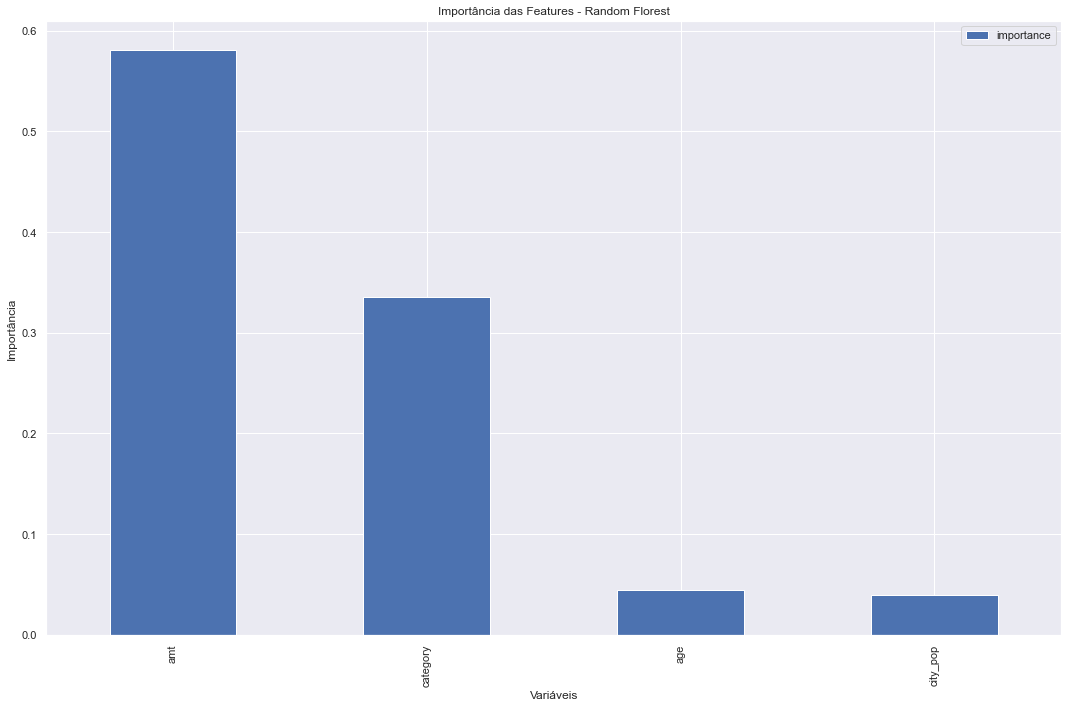

In [62]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_res_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances.reset_index(inplace=True)
feature_importances.rename(columns={"index": "features"}, inplace=True)

fig, ax = plt.subplots(figsize=(15,10))

feature_importances.plot(x="features", y="importance", kind="bar", ax=ax)

ax.set_title("Importância das Features - Random Florest")
ax.set_xlabel("Variáveis")
ax.set_ylabel("Importância")


plt.tight_layout()

# Tunando os hyperparametros

xgbc é o algoritmo selecionado

bayesian search otimzation

In [53]:
!pip install scikit-optimize

You should consider upgrading via the 'C:\Users\mathe\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\mathe\anaconda3\python.exe -m pip install --upgrade pip' command.


In [50]:
model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [63]:
from functools import partial
from skopt import gp_minimize
from skopt import space
from sklearn import model_selection

In [84]:
def optimizer(params, param_names, x,y):
    """
    Função objetivo para otimização dos hyperparametros do modelo xgboosting clf, o modelo escolhera
    os parametros e rodara um cross-validation o tipo de retorno da função sera o negativo do f1-score
    :param params: lista de parametros para o gp_minimize
    :param param_names: nome dos paramentos lista, ordem é importante
    :param x: dados para o treino
    :param y: dados para o treino label
    :return: iremos retornar o f1_score negativo
    """
    param = dict(zip(param_names,params)) # tranformando as listas em dicionarios

    #inicializando o modelo
    model_ = XGBClassifier(**param)

    cvs = cross_val_score(model_, x,y, scoring="precision", cv=3)
    mean = cvs.mean()
    return -1 * mean

In [89]:
param_names = ["eta","gamma","learning_rate","max_depth","min_child_weight","subsample","colsample_bytree","lambda","alpha"]

In [90]:
param_space = [space.Real(0.01,1,prior="uniform",name="eta"),
               space.Real(0.01,1,prior="uniform",name="gamma"),
               space.Real(0.001,10,prior="uniform",name="learning_rate"),
               space.Integer(3,25,name="max_depth"),
               space.Integer(1,7,name="min_child_weight"),
               space.Real(0.5,1,prior="uniform",name="subsample"),
               space.Real(0.5,1,prior="uniform",name="colsample_bytree"),
               space.Real(0.01,1,prior="uniform",name="lambda"),
               space.Real(0.01,1,prior="uniform",name="alpha")
               ]

In [91]:
optimization_func = partial(
    optimizer,
    param_names=param_names,
    x=X_res_train,
    y=y_res_train
)

In [92]:
result = gp_minimize(
    optimization_func,
    dimensions=param_space,
    n_calls=15,
    n_random_starts=10,
    verbose=10
)


Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 70.3083
Function value obtained: -0.5940
Current minimum: -0.5940
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 77.1765
Function value obtained: -0.7880
Current minimum: -0.7880
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 82.0474
Function value obtained: -0.8353
Current minimum: -0.8353
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 72.9672
Function value obtained: -0.6003
Current minimum: -0.8353
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 437.7428
Function value obtained: -0.9965
Current minimum: -0.9965
Iteration No: 6 sta

In [93]:
best_params = dict(
    zip(
        param_names,result.x
    )
)

In [94]:
#novo.
print(best_params)

{'eta': 0.01, 'gamma': 0.01, 'learning_rate': 1.059729270459231, 'max_depth': 14, 'min_child_weight': 1, 'subsample': 0.6529901061837307, 'colsample_bytree': 0.5, 'lambda': 0.021179577419204225, 'alpha': 0.5143908949259002}


In [78]:
#antigo
print(best_params)

{'eta': 0.867792289663926, 'gamma': 0.4144287348760188, 'max_depth': 22, 'min_child_weight': 1, 'subsample': 0.901810090651164, 'colsample_bytree': 0.5867329580002725, 'lambda': 0.31828557980936567, 'alpha': 0.9145225206893488}


In [95]:
model_final = XGBClassifier(**best_params)
model_final

XGBClassifier(alpha=0.5143908949259002, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01, eval_metric=None, gamma=0.01,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0.021179577419204225,
              learning_rate=1.059729270459231, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=14,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [96]:
model_final.fit(X_res_train,y_res_train)

XGBClassifier(alpha=0.5143908949259002, base_score=0.5, booster='gbtree',
              callbacks=None, colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01, eval_metric=None, gamma=0.01,
              gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', lambda=0.021179577419204225,
              learning_rate=1.059729270459231, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=14, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', ...)

In [97]:
df_model_final = best_model(x_val,y_val,[model_final])

--------------------------------------------------
XGBClassifier
recall : 0.615 std : 0.012
Intervalo :  [59.05% ~ 63.93%]

f1 : 0.637 std : 0.013
Intervalo :  [61.24% ~ 66.25%]

accuracy : 0.996 std : 0.0
Intervalo :  [99.55% ~ 99.63%]

precision : 0.662 std : 0.023
Intervalo :  [61.56% ~ 70.91%]




,accuracy,f1,precision,recall
XGBClassifier,0.996,0.654,0.693,0.621


## Avaliando o melhor modelo:

Testes

In [98]:

test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,age,dist_fraude_km
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,Mechanical engineer,1968-03-19 00:00:00,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21 00:00:00,52.0,24.561
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,"Sales professional, IT",1990-01-17 00:00:00,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21 00:00:00,30.0,104.925
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,"Librarian, public",1970-10-21 00:00:00,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21 00:00:00,49.0,59.080
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,Set designer,1987-07-25 00:00:00,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21 00:00:00,32.0,27.699
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,Furniture designer,1955-07-06 00:00:00,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21 00:00:00,64.0,104.335


In [99]:
test_model_prep = test.drop(columns = ['trans_date_trans_time','city','lat','long','dob','merch_lat','merch_long','trans_date','state','street',"first","last","unix_time","merchant","cc_num","trans_num","zip","gender","job","dist_fraude_km"])

In [100]:
# for col in test_model_prep.columns:
#     if test_model_prep[col].dtypes == object:
#         test_model_prep[col]= le.fit_transform(test_model_prep[col])

In [101]:
test_model_prep.head()

,category,amt,city_pop,is_fraud,age
0,personal_care,2.86,333497,0,52.0
1,personal_care,29.84,302,0,30.0
2,health_fitness,41.28,34496,0,49.0
3,misc_pos,60.05,54767,0,32.0
4,travel,3.19,1126,0,64.0


In [102]:
y_test_true = test_model_prep.is_fraud

In [103]:
x_test = test_model_prep.drop(columns=["is_fraud"])

In [104]:
x_test

,category,amt,city_pop,age
0,personal_care,2.86,333497,52.0
1,personal_care,29.84,302,30.0
2,health_fitness,41.28,34496,49.0
3,misc_pos,60.05,54767,32.0
4,travel,3.19,1126,64.0
...,...,...,...,...
555714,health_fitness,43.77,519,54.0
555715,kids_pets,111.84,28739,21.0
555716,kids_pets,86.88,3684,39.0
555717,travel,7.99,129,55.0


In [105]:
le_category = LabelEncoder().fit(x_test['category'])

In [106]:
x_test['category'] = le_category.transform( x_test['category'])

In [111]:
pred_val = model_final.predict(x_val)

In [112]:
pred_test = model_final.predict(x_test)

In [110]:
_=best_model(x_test,y_test_true,[model_final])

--------------------------------------------------
XGBClassifier
recall : 0.237 std : 0.08
Intervalo :  [7.67% ~ 39.79%]

f1 : 0.322 std : 0.07
Intervalo :  [18.21% ~ 46.16%]

accuracy : 0.996 std : 0.0
Intervalo :  [99.62% ~ 99.64%]

precision : 0.549 std : 0.026
Intervalo :  [49.71% ~ 60.07%]




  Accuracy:

validation:

In [113]:
accuracy_score(y_val,pred_val)

0.9968175052634556

test data

In [114]:
accuracy_score(y_test_true,pred_test)

0.9966115968682013

F1

val data

In [115]:
f1_score(y_val,pred_val)

0.7360341151385927

test data

In [135]:
f1_score(y_test_true,pred_test,average='weighted')

0.9966784568606123

Recall

val data

In [117]:
recall_score(y_val,pred_val)

0.7553610503282275

test data

In [132]:
recall_score(y_test_true,pred_test,average='weighted')

0.9966115968682013

ROC

val data

In [119]:
roc_auc_score(y_val,pred_val)

0.8768026244716195

test data

In [131]:
roc_auc_score(y_test_true,pred_test,average='weighted')

0.8002351829063346

val_data

In [130]:
precision_score(y_val,pred_val,average='weighted')

0.9969041521641405

test data

In [129]:
precision_score(y_test_true,pred_test,average='weighted')

0.9967523899417671

Classification report

In [156]:
test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,age,dist_fraude_km
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,Mechanical engineer,1968-03-19 00:00:00,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21 00:00:00,52.0,24.561
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,"Sales professional, IT",1990-01-17 00:00:00,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21 00:00:00,30.0,104.925
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,"Librarian, public",1970-10-21 00:00:00,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21 00:00:00,49.0,59.080
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,Set designer,1987-07-25 00:00:00,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21 00:00:00,32.0,27.699
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,Furniture designer,1955-07-06 00:00:00,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21 00:00:00,64.0,104.335


In [123]:
target_names = ["não fraude", "fraude"]

In [124]:
print("Dados de Validação")
print(classification_report(y_val, pred_val, target_names=target_names))

Dados de Validação
              precision    recall  f1-score   support

  não fraude       1.00      1.00      1.00    386718
      fraude       0.72      0.76      0.74      2285

    accuracy                           1.00    389003
   macro avg       0.86      0.88      0.87    389003
weighted avg       1.00      1.00      1.00    389003



In [125]:
print("Dados de teste")
print(classification_report(y_test_true, pred_test, target_names=target_names))

Dados de teste
              precision    recall  f1-score   support

  não fraude       1.00      1.00      1.00    553574
      fraude       0.56      0.60      0.58      2145

    accuracy                           1.00    555719
   macro avg       0.78      0.80      0.79    555719
weighted avg       1.00      1.00      1.00    555719



In [126]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

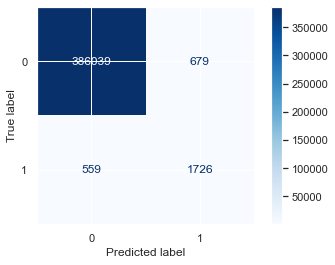

In [127]:
cm = confusion_matrix(y_val, pred_val, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.from_predictions(y_val, pred_val,display_labels=model.classes_, cmap="Blues")
plt.show()

plot matriz de confusão test data

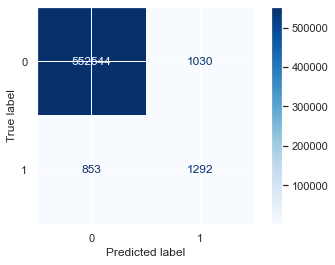

In [128]:
cm = confusion_matrix(y_test_true, pred_test, labels=model.classes_, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.from_predictions(y_test_true, pred_test,display_labels=model.classes_, cmap="Blues")
plt.show()

Serialização

In [136]:
# salvar modelo
import pickle
# salvar o modelo Random florest  no arquivo model_randFlorest.pkl
with open('xgbmodel.pkl', 'wb') as file:
    pickle.dump(model, file)

## Salvando o encoder

In [32]:
import pickle
with open('./model_randFlorest.pkl', 'rb') as arq:
    model_pkl = pickle.load(arq)

In [172]:
le = LabelEncoder()

In [173]:
train_model_prep

,category,amt,gender,city_pop,job,is_fraud,age
0,misc_net,4.97,F,3495,"Psychologist, counselling",0,30.0
1,grocery_pos,107.23,F,149,Special educational needs teacher,0,40.0
2,entertainment,220.11,M,4154,Nature conservation officer,0,56.0
3,gas_transport,45.00,M,1939,Patent attorney,0,51.0
4,misc_pos,41.96,M,99,Dance movement psychotherapist,0,32.0
...,...,...,...,...,...,...,...
770705,food_dining,3.06,F,1675,Barrister,0,33.0
770706,home,9.49,F,1606,Ecologist,0,53.0
770707,entertainment,78.76,M,1442,Air broker,0,37.0
770708,travel,506.00,M,1446,Chartered loss adjuster,0,41.0


In [174]:
for col in test_model_prep.columns:
    if train_model_prep[col].dtypes == object:
        le.fit(train_model_prep[col])

In [175]:
train_model_prep

,category,amt,gender,city_pop,job,is_fraud,age
0,misc_net,4.97,F,3495,"Psychologist, counselling",0,30.0
1,grocery_pos,107.23,F,149,Special educational needs teacher,0,40.0
2,entertainment,220.11,M,4154,Nature conservation officer,0,56.0
3,gas_transport,45.00,M,1939,Patent attorney,0,51.0
4,misc_pos,41.96,M,99,Dance movement psychotherapist,0,32.0
...,...,...,...,...,...,...,...
770705,food_dining,3.06,F,1675,Barrister,0,33.0
770706,home,9.49,F,1606,Ecologist,0,53.0
770707,entertainment,78.76,M,1442,Air broker,0,37.0
770708,travel,506.00,M,1446,Chartered loss adjuster,0,41.0


In [75]:
# salvar o salvando o label encoder  no arquivo encoder.pkl
# with open('encoder.pkl', 'wb') as file:
#     pickle.dump(le_category, file)

Sample para api

In [230]:
a=test_model_prep[test_model_prep["is_fraud"]==1].sample(n=1)

In [229]:
b = test_model_prep[test_model_prep["is_fraud"]==0].sample(n=1)

In [231]:
a

,category,amt,city_pop,is_fraud,age,dist_fraude_km
403273,misc_net,836.44,1804,1,46.0,65.082


In [232]:
b

,category,amt,city_pop,is_fraud,age,dist_fraude_km
510692,kids_pets,34.48,5848,0,39.0,85.25
